<style>
h1 {
    border-bottom: 2px solid;
}
h2 {
    border-bottom: 1px solid;
}
/* hr {
    border-top: 2px solid;
    border-bottom: none;
} */
.student-info {
    text-align: right;
    border-bottom: none;
}
hr.double-div {
    border-top: 2px solid;
    border-bottom: 2px solid;
    border-left: none;
    border-right: none;
    height: 10pt;
    /* border-radius: 1px; */
}
blockquote {
    border-left: 2px solid;
    /* background-color: #00000488; */
    /* filter: brightness(80%); */
    margin-left: 2em;
    margin-right: 2em;
    padding: 1px 2px 1px 1em;
}
pre {
    border: 1px solid #88888888;
    margin-left: 1em;
    margin-right: 1em;
    padding: 0.5em;
    /*padding: 8pt 1em 8pt 1em;*/
}
blockquote > pre {
    margin-left: 0.5em;
}
img {
    display: block;
    margin-left: auto;
    margin-right: auto;
}
</style>

<h2 class="student-info">
    Andrew Osterhout <br/>
    (u1317172)
</h2>

# Asg-9 template

In [3]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.Def_PDA    import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


# Problem 6, Page 159, the "OR" case.
## Test your CFG below for 

$ \{ a^i c^k b^j d^l \;:\; (i==j)\; OR\; (k==l)\}$

## Note that for the CFG that is to be simulated using Jove's PDA, the nonterminals must be only a single letter (i.e. if you used a nonterminals "As" for one or more a, and you pushed As on the stack, it will be interpreted as "A" followed by "s").

In [ ]:
# Type the CFG in the comments of the PDA
# Then convert to PDA and run the tests below

pda_acbd = md2mc(
'''
PDA

!!---Initially I'll write using multi-letter nonterminals...
!!   Then I'll turn them into single-letter nonterminals.
!!
!! S        ->  i_EQ_j | k_EQ_l | ε
!! i_EQ_j   ->  a i_EQ_j b D | C
!! k_EQ_l   ->  A c k_EQ_l D | B 
!! A        ->  a A | ε
!! B        ->  b B | ε
!! C        ->  c C | ε
!! D        ->  d D | ε


!!---Now turning into single-letter non-terminals
!!---To avoid the dual-use of "S", the second use is "Z"
!!
!! S    ->  J | K | ε
!! J    ->  a J b D | C
!! K    ->  A c K D | B 
!! A    ->  a A | ε
!! B    ->  b B | ε
!! C    ->  c C | ε
!! D    ->  d D | ε


!!=== PDA below ======================================

!!-- Initial State & Setup -------------
IF  : '','' ; S     -> M


!!-- Set up Paths for Grammers ---------
!!- S / "starting" grammar -
M   : '',S  ; J     -> M
M   : '',S  ; K     -> M
M   : '',S  ; ''    -> M

!!- J / i_EQ_j grammar -----
M   : '',J  ; aJbD  -> M
M   : '',J  ; C     -> M

!!- K / k_EQ_l grammar -----
M   : '',K  ; AcKd  -> M
M   : '',K  ; B     -> M

!!- A gramer ---------------
M   : '',A  ; aA    -> M
M   : '',A  ; ''    -> M

!!- B gramer ---------------
M   : '',B  ; bB    -> M
M   : '',B  ; ''    -> M

!!- C gramer ---------------
M   : '',C  ; cC    -> M
M   : '',C  ; ''    -> M

!!- D gramer ---------------
M   : '',D  ; dD    -> M
M   : '',D  ; ''    -> M


!!-- Setup paths for string processing --
M   : a,a   ; ''    -> M
M   : b,b   ; ''    -> M
M   : c,c   ; ''    -> M
M   : d,d   ; ''    -> M


!!-- Final Acceptance Condition ---------
M   : '',#  ; #     -> F

''')

In [ ]:
dotObj_pda(pda_acbd, FuseEdges=True)

In [ ]:
explore_pda("acbd", pda_acbd)   # ACCEPT

In [ ]:
explore_pda("aacbbd", pda_acbd) # ACCEPT

In [ ]:
explore_pda("aaaccbbbddd", pda_acbd)    # ACCEPT

In [ ]:
explore_pda("aaaacccbbbddd", pda_acbd)  # ACCEPT

In [ ]:
explore_pda("aaaacccbbbdddd", pda_acbd) # REJECT

In [ ]:
explore_pda("aaaabbbb", pda_acbd)   # ACCEPT

In [ ]:
explore_pda("aaaabbb", pda_acbd)    # REJECT

In [ ]:
explore_pda("aaaabbbd", pda_acbd)   # REJECT

In [ ]:
explore_pda("aaaacbbb", pda_acbd)   # REJECT

## Now, provide five of your own tests and run them; cover more interesting cases that are likely not covered by the above tests (or if covered, try to find new variations with respect to the numbers of various symbols.

In [ ]:
explore_pda("", pda_acbd)   # ACCEPT

In [ ]:
explore_pda("aaaaaaaaccccccccccbbbbbbbbdddddddddd", pda_acbd)   # ACCEPT

In [ ]:
explore_pda("dbca", pda_acbd)   # REJECT

In [ ]:
explore_pda("aaabbbcccddd", pda_acbd)   # REJECT

In [ ]:
explore_pda("ddbbbccaaa", pda_acbd) # REJECT

# Asg9 DTM for $w\#x$ where $w$ is a substring of $x$

In [7]:
Asg9DTM = md2mc('''
TM     
!! DTM means that given one input state combo there can only be one output.
!! Q: {Iq0, q1, }
!! Σ: {a, b, #, ε}
!! Γ: {a, b, #, A, B, N, 0, 1, ., ε}
!! q₀: IFq0
!! F: {Iq0, }

!!---- Identify & accept ε substring ----
Iq0 : # ;   # , R   -> Fq0
Iq0 : a ;   a , S   -> A0
Iq0 : b ;   b , S   -> B0


!!---- If w starts with a ---------------
!!--- Identify the form of w in x -----
!!-- (a) Identify 'a' in ~substring --
A0  : a ;   A , R   -> A1a

A1a : a ;   a , R   -> A1a
A1a : b ;   b , R   -> A1a
A1a : # ;   # , R   -> A2a

A2a : A ;   A , R   -> A2a
A2a : B ;   B , R   -> A2a
A2a : N ;   N , R   -> A2a

A2a : a ;   A , L   -> A3
A2a : # ;   A , L   -> A3
A2a : b ;   N , L   -> A3n

!!-- (a) Identify 'b' in ~substring --
A0  : b ;   B , R   -> A1b

A1b : a ;   a , R   -> A1b
A1b : b ;   b , R   -> A1b
A1b : # ;   # , R   -> A2b

A2b : A ;   A , R   -> A2b
A2b : B ;   B , R   -> A2b
A2b : N ;   N , R   -> A2b

A2b : a ;   # , L   -> A3n
A2b : b ;   B , L   -> A3

!!-- (a) Still a ~substring ---------       !! Continue id process
A3  : A ;   A , L   -> A3
A3  : B ;   B , L   -> A3
A3  : N ;   N , L   -> A3
A3  : # ;   # , L   -> A4

A4  : a ;   a , L   -> A4
A4  : b ;   b , L   -> A4
A4  : A ;   A , R   -> A0
A4  : B ;   B , R   -> A0

!!-- (a) Not a ~substring -----------       !! Clear checks and restart id process
A3n : A ;   N , L   -> A3n
A3n : B ;   N , L   -> A3n
A3n : N ;   N , L   -> A3n
A3n : # ;   # , L   -> A4n

A4n : a ;   a , L   -> A4n
A4n : b ;   b , L   -> A4n
A4n : A ;   a , L   -> A5n
A4n : B ;   b , L   -> A5n

A5n : A ;   a , L   -> A5n
A5n : B ;   b , L   -> A5n
A5n : . ;   . , R   -> A0



!!---- If w starts with b ---------------
!!--- Identify the form of w in x -----
!!-- (b) Identify 'a' in ~substring --
B0  : a ;   A , R   -> B1a

B1a : a ;   a , R   -> B1a
B1a : b ;   b , R   -> B1a
B1a : # ;   # , R   -> B2a

B2a : A ;   A , R   -> B2a
B2a : B ;   B , R   -> B2a
B2a : N ;   N , R   -> B2a

B2a : a ;   A , L   -> B3
B2a : b ;   #, L   -> B3n

!!-- (b) Identify 'b' in ~substring --
B0  : b ;   B , R   -> B1b

B1b : a ;   a , R   -> B1b
B1b : b ;   b , R   -> B1b
B1b : # ;   # , R   -> B2b

B2b : A ;   A , R   -> B2b
B2b : B ;   B , R   -> B2b
B2b : N ;   N , R   -> B2b

B2b : a ;   N , L   -> B3n
B2b : b ;   B , L   -> B3
B2b : # ;   B , L   -> B3

!!-- (b) Still a ~substring ---------       !! Continue id process
B3  : A ;   A , L   -> B3
B3  : B ;   B , L   -> B3
B3  : N ;   N , L   -> B3
B3  : # ;   # , L   -> B4

B4  : a ;   a , L   -> B4
B4  : b ;   b , L   -> B4
B4  : A ;   A , R   -> B0
B4  : B ;   B , R   -> B0

!!-- (b) Not a ~substring -----------       !! Clear checks and restart id process
B3n : A ;   N , L   -> B3n
B3n : B ;   N , L   -> B3n
B3n : N ;   N , L   -> B3n
B3n : # ;   # , L   -> B4n

B4n : a ;   a , L   -> B4n
B4n : b ;   b , L   -> B4n
B4n : A ;   a , L   -> B5n
B4n : B ;   b , L   -> B5n

B5n : A ;   a , L   -> B5n
B5n : B ;   b , L   -> B5n
B5n : . ;   . , R   -> B0



!!---- Confirm Substring ---------------
A0  : # ;   # , R   -> q5
B0  : # ;   # , R   -> q5

q5  : N ;   N , R   -> q5       !! find the bedinign of substirng
q5  : A ;   A , R   -> q6
q5  : B ;   B , R   -> q6

q6  : A ;   A , R   -> q6       !! parse through substring
q6  : B ;   B , R   -> q6

q6  : . ;   . , S   -> Fq7      !! finish/accept when end up substring reached
q6  : a ;   a , S   -> Fq7
q6  : b ;   b , S   -> Fq7


''')


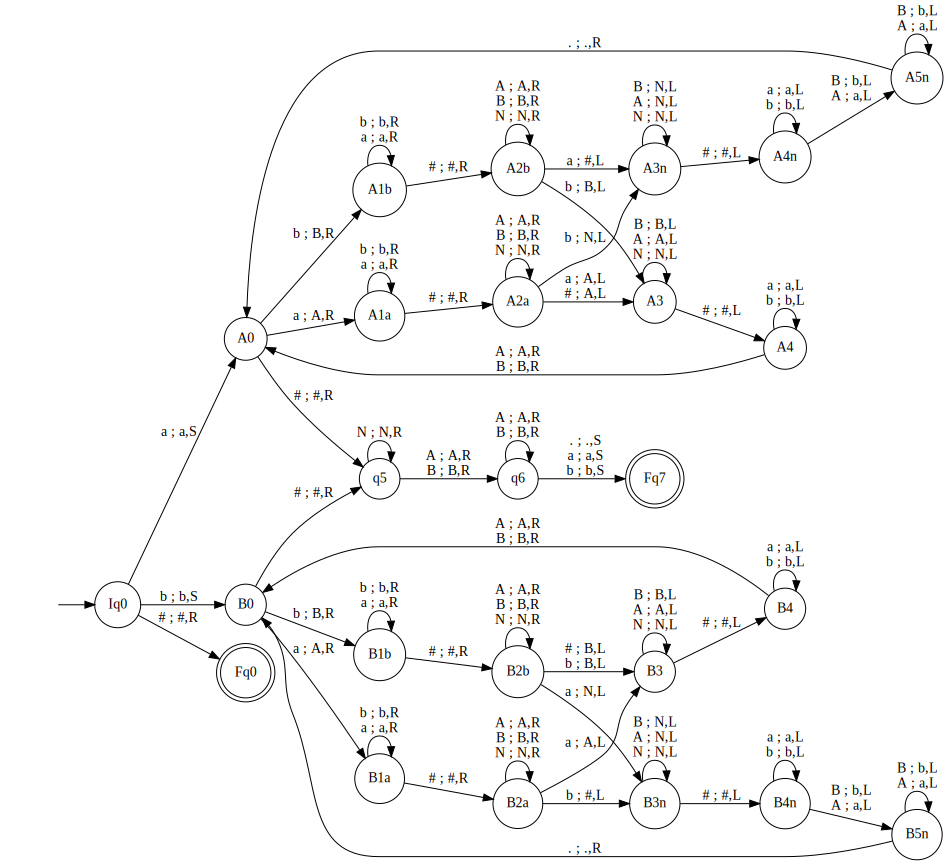

In [8]:
dotObj_tm(Asg9DTM, FuseEdges=True)

# Tests for the DTM

### (a) `aba#aba` – pass 
### (b) `aba#ab` – fail
### (c) `aba#baba` – pass 
### (d) `aba#babba` – fail
### (e) `bba#bbabba` – pass


## Please include five more tests of your own

In [ ]:
help(explore_tm)

In [9]:
explore_tm(Asg9DTM, "aba#aba",50)   # PASS

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq7', 7, 'ABA#ABA........', 17)
 via .. 
 ->('Iq0', 0, 'aba#aba', 50)
 ->('A0', 0, 'aba#aba', 49)
 ->('A1a', 1, 'Aba#aba', 48)
 ->('A1a', 2, 'Aba#aba', 47)
 ->('A1a', 3, 'Aba#aba', 46)
 ->('A2a', 4, 'Aba#aba', 45)
 ->('A3', 3, 'Aba#Aba', 44)
 ->('A4', 2, 'Aba#Aba', 43)
 ->('A4', 1, 'Aba#Aba', 42)
 ->('A4', 0, 'Aba#Aba', 41)
 ->('A0', 1, 'Aba#Aba', 40)
 ->('A1b', 2, 'ABa#Aba', 39)
 ->('A1b', 3, 'ABa#Aba', 38)
 ->('A2b', 4, 'ABa#Aba', 37)
 ->('A2b', 5, 'ABa#Aba', 36)
 ->('A3', 4, 'ABa#ABa', 35)
 ->('A3', 3, 'ABa#ABa', 34)
 ->('A4', 2, 'ABa#ABa', 33)
 ->('A4', 1, 'ABa#ABa', 32)
 ->('A0', 2, 'ABa#ABa', 31)
 ->('A1a', 3, 'ABA#ABa', 30)
 ->('A2a', 4, 'ABA#ABa', 29)
 ->('A2a', 5, 'ABA#ABa', 28)
 ->('A2a', 6, 'ABA#ABa', 27)
 ->('A3', 5, 'ABA#ABA', 26)
 ->('A3', 4, 'ABA#ABA', 25)
 ->('A3', 3, 'ABA#ABA', 24)
 ->('A4', 2, 'ABA#ABA', 23)
 ->('A0', 3, 'ABA#ABA', 22)
 ->('q5', 4, 'ABA#ABA', 21)
 ->('q6', 5, 'ABA

In [10]:
explore_tm(Asg9DTM, "aba#ab",50)    # FAIL

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2a', 6, 'ABA#AB', 27)
 via .. 
 ->('Iq0', 0, 'aba#ab', 50)
 ->('A0', 0, 'aba#ab', 49)
 ->('A1a', 1, 'Aba#ab', 48)
 ->('A1a', 2, 'Aba#ab', 47)
 ->('A1a', 3, 'Aba#ab', 46)
 ->('A2a', 4, 'Aba#ab', 45)
 ->('A3', 3, 'Aba#Ab', 44)
 ->('A4', 2, 'Aba#Ab', 43)
 ->('A4', 1, 'Aba#Ab', 42)
 ->('A4', 0, 'Aba#Ab', 41)
 ->('A0', 1, 'Aba#Ab', 40)
 ->('A1b', 2, 'ABa#Ab', 39)
 ->('A1b', 3, 'ABa#Ab', 38)
 ->('A2b', 4, 'ABa#Ab', 37)
 ->('A2b', 5, 'ABa#Ab', 36)
 ->('A3', 4, 'ABa#AB', 35)
 ->('A3', 3, 'ABa#AB', 34)
 ->('A4', 2, 'ABa#AB', 33)
 ->('A4', 1, 'ABa#AB', 32)
 ->('A0', 2, 'ABa#AB', 31)
 ->('A1a', 3, 'ABA#AB', 30)
 ->('A2a', 4, 'ABA#AB', 29)
 ->('A2a', 5, 'ABA#AB', 28)
 ->('A2a', 6, 'ABA#AB', 27)


In [13]:
explore_tm(Asg9DTM, "aba#baba",51)  # PASS

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq7', 16, '........ABA#NABA........', 1)
 via .. 
 ->('Iq0', 0, 'aba#baba', 51)
 ->('A0', 0, 'aba#baba', 50)
 ->('A1a', 1, 'Aba#baba', 49)
 ->('A1a', 2, 'Aba#baba', 48)
 ->('A1a', 3, 'Aba#baba', 47)
 ->('A2a', 4, 'Aba#baba', 46)
 ->('A3n', 3, 'Aba#Naba', 45)
 ->('A4n', 2, 'Aba#Naba', 44)
 ->('A4n', 1, 'Aba#Naba', 43)
 ->('A4n', 0, 'Aba#Naba', 42)
 ->('A5n', 7, '........aba#Naba', 41)
 ->('A0', 8, '........aba#Naba', 40)
 ->('A1a', 9, '........Aba#Naba', 39)
 ->('A1a', 10, '........Aba#Naba', 38)
 ->('A1a', 11, '........Aba#Naba', 37)
 ->('A2a', 12, '........Aba#Naba', 36)
 ->('A2a', 13, '........Aba#Naba', 35)
 ->('A3', 12, '........Aba#NAba', 34)
 ->('A3', 11, '........Aba#NAba', 33)
 ->('A4', 10, '........Aba#NAba', 32)
 ->('A4', 9, '........Aba#NAba', 31)
 ->('A4', 8, '........Aba#NAba', 30)
 ->('A0', 9, '........Aba#NAba', 29)
 ->('A1b', 10, '........ABa#N

In [15]:
explore_tm(Asg9DTM, "aba#babba",73) # FAIL

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2b', 17, '........ABa#NNNNA', 1)
 via .. 
 ->('Iq0', 0, 'aba#babba', 73)
 ->('A0', 0, 'aba#babba', 72)
 ->('A1a', 1, 'Aba#babba', 71)
 ->('A1a', 2, 'Aba#babba', 70)
 ->('A1a', 3, 'Aba#babba', 69)
 ->('A2a', 4, 'Aba#babba', 68)
 ->('A3n', 3, 'Aba#Nabba', 67)
 ->('A4n', 2, 'Aba#Nabba', 66)
 ->('A4n', 1, 'Aba#Nabba', 65)
 ->('A4n', 0, 'Aba#Nabba', 64)
 ->('A5n', 7, '........aba#Nabba', 63)
 ->('A0', 8, '........aba#Nabba', 62)
 ->('A1a', 9, '........Aba#Nabba', 61)
 ->('A1a', 10, '........Aba#Nabba', 60)
 ->('A1a', 11, '........Aba#Nabba', 59)
 ->('A2a', 12, '........Aba#Nabba', 58)
 ->('A2a', 13, '........Aba#Nabba', 57)
 ->('A3', 12, '........Aba#NAbba', 56)
 ->('A3', 11, '........Aba#NAbba', 55)
 ->('A4', 10, '........Aba#NAbba', 54)
 ->('A4', 9, '........Aba#NAbba', 53)
 ->('A4', 8, '........Aba#NAbba', 52)
 ->('A0', 9, '........Aba#NAbba', 51)
 ->('A1b', 10

In [16]:
explore_tm(Asg9DTM, "bba#bbabba",50)    # PASS

Detailing the halted configs now.
Accepted at  ('Fq7', 7, 'BBA#BBAbba', 17)
 via .. 
 ->('Iq0', 0, 'bba#bbabba', 50)
 ->('B0', 0, 'bba#bbabba', 49)
 ->('B1b', 1, 'Bba#bbabba', 48)
 ->('B1b', 2, 'Bba#bbabba', 47)
 ->('B1b', 3, 'Bba#bbabba', 46)
 ->('B2b', 4, 'Bba#bbabba', 45)
 ->('B3', 3, 'Bba#Bbabba', 44)
 ->('B4', 2, 'Bba#Bbabba', 43)
 ->('B4', 1, 'Bba#Bbabba', 42)
 ->('B4', 0, 'Bba#Bbabba', 41)
 ->('B0', 1, 'Bba#Bbabba', 40)
 ->('B1b', 2, 'BBa#Bbabba', 39)
 ->('B1b', 3, 'BBa#Bbabba', 38)
 ->('B2b', 4, 'BBa#Bbabba', 37)
 ->('B2b', 5, 'BBa#Bbabba', 36)
 ->('B3', 4, 'BBa#BBabba', 35)
 ->('B3', 3, 'BBa#BBabba', 34)
 ->('B4', 2, 'BBa#BBabba', 33)
 ->('B4', 1, 'BBa#BBabba', 32)
 ->('B0', 2, 'BBa#BBabba', 31)
 ->('B1a', 3, 'BBA#BBabba', 30)
 ->('B2a', 4, 'BBA#BBabba', 29)
 ->('B2a', 5, 'BBA#BBabba', 28)
 ->('B2a', 6, 'BBA#BBabba', 27)
 ->('B3', 5, 'BBA#BBAbba', 26)
 ->('B3', 4, 'BBA#BBAbba', 25)
 ->('B3', 3, 'BBA#BBAbba', 24)
 ->('B4', 2, 'BBA#BBAbba', 23)
 ->('B0', 3, 'BBA#BBAbba', 22)
 ->

### My 5 Tests
- `#abab` – PASS
- `abaaba#bbaabaabaabb` – PASS
- `aaabbbaaa#bbbaaabbbaaa` – PASS
- `aaabbb#ab` – FAIL
- `aaabbb#abbbaaab` – FAIL


In [24]:
explore_tm(Asg9DTM, "#abab",2) # PASS

Detailing the halted configs now.
Accepted at  ('Fq0', 1, '#abab', 1)
 via .. 
 ->('Iq0', 0, '#abab', 2)
 ->('Fq0', 1, '#abab', 1)


In [22]:
explore_tm(Asg9DTM, "abaaba#bbaabaabaabb",213)   # PASS

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('Fq7', 24, '........ABAABA#NNNABAABAabb', 1)
 via .. 
 ->('Iq0', 0, 'abaaba#bbaabaabaabb', 213)
 ->('A0', 0, 'abaaba#bbaabaabaabb', 212)
 ->('A1a', 1, 'Abaaba#bbaabaabaabb', 211)
 ->('A1a', 2, 'Abaaba#bbaabaabaabb', 210)
 ->('A1a', 3, 'Abaaba#bbaabaabaabb', 209)
 ->('A1a', 4, 'Abaaba#bbaabaabaabb', 208)
 ->('A1a', 5, 'Abaaba#bbaabaabaabb', 207)
 ->('A1a', 6, 'Abaaba#bbaabaabaabb', 206)
 ->('A2a', 7, 'Abaaba#bbaabaabaabb', 205)
 ->('A3n', 6, 'Abaaba#Nbaabaabaabb', 204)
 ->('A4n', 5, 'Abaaba#Nbaabaabaabb', 203)
 ->('A4n', 4, 'Abaaba#Nbaabaabaabb', 202)
 ->('A4n', 3, 'Abaaba#Nbaabaabaabb', 201)
 ->('A4n', 2, 'Abaaba#Nbaabaabaabb', 200)
 ->('A4n', 1, 'Abaaba#Nbaabaabaabb', 199)
 ->('A4n', 0, 'Abaaba#Nbaabaabaabb', 198)
 ->('A5n', 7, '........abaaba#Nbaabaabaabb', 197)
 ->('A0', 8, '........abaaba#Nbaabaabaabb', 196)
 ->('A1a', 9, '........Abaaba#Nbaabaabaabb', 195)
 ->('A1a', 10, '........Abaaba#Nbaabaab

In [33]:
explore_tm(Asg9DTM, "aaabbbaaa#bbbaaabbbaaa",331)    # PASS

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq7', 30, '........AAABBBAAA#NNNAAABBBAAA........', 1)
 via .. 
 ->('Iq0', 0, 'aaabbbaaa#bbbaaabbbaaa', 331)
 ->('A0', 0, 'aaabbbaaa#bbbaaabbbaaa', 330)
 ->('A1a', 1, 'Aaabbbaaa#bbbaaabbbaaa', 329)
 ->('A1a', 2, 'Aaabbbaaa#bbbaaabbbaaa', 328)
 ->('A1a', 3, 'Aaabbbaaa#bbbaaabbbaaa', 327)
 ->('A1a', 4, 'Aaabbbaaa#bbbaaabbbaaa', 326)
 ->('A1a', 5, 'Aaabbbaaa#bbbaaabbbaaa', 325)
 ->('A1a', 6, 'Aaabbbaaa#bbbaaabbbaaa', 324)
 ->('A1a', 7, 'Aaabbbaaa#bbbaaabbbaaa', 323)
 ->('A1a', 8, 'Aaabbbaaa#bbbaaabbbaaa', 322)
 ->('A1a', 9, 'Aaabbbaaa#bbbaaabbbaaa', 321)
 ->('A2a', 10, 'Aaabbbaaa#bbbaaabbbaaa', 320)
 ->('A3n', 9, 'Aaabbbaaa#Nbbaaabbbaaa', 319)
 ->('A4n', 8, 'Aaabbbaaa#Nbbaaabbbaaa', 318)
 ->('A4n', 7, 'Aaabbbaaa#Nbbaaabbbaaa', 317)
 ->('A4n', 6, 'Aaabbbaaa#Nbbaaabbbaaa', 316)
 ->('A4n', 5, 'Aaabbbaaa#Nbbaaabbbaaa', 315)
 ->('A4n', 4, 'Aaabbbaaa#Nbbaaabbbaaa', 314

In [35]:
explore_tm(Asg9DTM, "aaabbb#ab",43) # FAIL

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2a', 17, '........Aaabbb#NN', 1)
 via .. 
 ->('Iq0', 0, 'aaabbb#ab', 43)
 ->('A0', 0, 'aaabbb#ab', 42)
 ->('A1a', 1, 'Aaabbb#ab', 41)
 ->('A1a', 2, 'Aaabbb#ab', 40)
 ->('A1a', 3, 'Aaabbb#ab', 39)
 ->('A1a', 4, 'Aaabbb#ab', 38)
 ->('A1a', 5, 'Aaabbb#ab', 37)
 ->('A1a', 6, 'Aaabbb#ab', 36)
 ->('A2a', 7, 'Aaabbb#ab', 35)
 ->('A3', 6, 'Aaabbb#Ab', 34)
 ->('A4', 5, 'Aaabbb#Ab', 33)
 ->('A4', 4, 'Aaabbb#Ab', 32)
 ->('A4', 3, 'Aaabbb#Ab', 31)
 ->('A4', 2, 'Aaabbb#Ab', 30)
 ->('A4', 1, 'Aaabbb#Ab', 29)
 ->('A4', 0, 'Aaabbb#Ab', 28)
 ->('A0', 1, 'Aaabbb#Ab', 27)
 ->('A1a', 2, 'AAabbb#Ab', 26)
 ->('A1a', 3, 'AAabbb#Ab', 25)
 ->('A1a', 4, 'AAabbb#Ab', 24)
 ->('A1a', 5, 'AAabbb#Ab', 23)
 ->('A1a', 6, 'AAabbb#Ab', 22)
 ->('A2a', 7, 'AAabbb#Ab', 21)
 ->('A2a', 8, 'AAabbb#Ab', 20)
 ->('A3n', 7, 'AAabbb#AN', 19)
 ->('A3n', 6, 'AAabbb#NN', 18)
 ->('A4n', 5, 'AAabbb#NN', 17)
 

In [40]:
explore_tm(Asg9DTM, "aaabbb#abbbaaab",179)   # FAIL

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('A2b', 23, '........AAABBb#NNNNAAAB', 1)
 via .. 
 ->('Iq0', 0, 'aaabbb#abbbaaab', 179)
 ->('A0', 0, 'aaabbb#abbbaaab', 178)
 ->('A1a', 1, 'Aaabbb#abbbaaab', 177)
 ->('A1a', 2, 'Aaabbb#abbbaaab', 176)
 ->('A1a', 3, 'Aaabbb#abbbaaab', 175)
 ->('A1a', 4, 'Aaabbb#abbbaaab', 174)
 ->('A1a', 5, 'Aaabbb#abbbaaab', 173)
 ->('A1a', 6, 'Aaabbb#abbbaaab', 172)
 ->('A2a', 7, 'Aaabbb#abbbaaab', 171)
 ->('A3', 6, 'Aaabbb#Abbbaaab', 170)
 ->('A4', 5, 'Aaabbb#Abbbaaab', 169)
 ->('A4', 4, 'Aaabbb#Abbbaaab', 168)
 ->('A4', 3, 'Aaabbb#Abbbaaab', 167)
 ->('A4', 2, 'Aaabbb#Abbbaaab', 166)
 ->('A4', 1, 'Aaabbb#Abbbaaab', 165)
 ->('A4', 0, 'Aaabbb#Abbbaaab', 164)
 ->('A0', 1, 'Aaabbb#Abbbaaab', 163)
 ->('A1a', 2, 'AAabbb#Abbbaaab', 162)
 ->('A1a', 3, 'AAabbb#Abbbaaab', 161)
 ->('A1a', 4, 'AAabbb#Abbbaaab', 160)
 ->('A1a', 5, 'AAabbb#Abbbaaab', 159)
 ->('A1a', 6, 'AAabbb#Abbbaaab', 1

# Asg9 NDTM for w#x where w is a substring of x

In [ ]:
# w#x NDTM
 

Asg9NDTM = md2mc('''TM
  
 

''')



In [ ]:
explore_tm(Asg9NDTM, "aba#aba",50)

In [ ]:
explore_tm(Asg9NDTM, "aba#ab",50)

In [ ]:
explore_tm(Asg9NDTM, "aba#baba",50)

In [ ]:
explore_tm(Asg9NDTM, "aba#babba",50)

In [ ]:
explore_tm(Asg9NDTM, "bba#bbabba",50)

# END